In [2]:
#If the data point clearly will not fit a linear regrssn, a polynomail regrssn might be considered instead.
#However, it is still x and y dependent

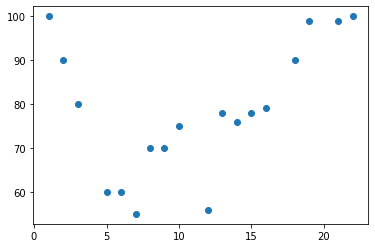

In [4]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22])

y =np.array([100,90,80,60,60,55,70,70,75,56,78,76,78,79,90,99,99,100])

plt.scatter(x,y)
plt.show()

In [2]:
print(len(x))

18


In [5]:
print(len(y))

18


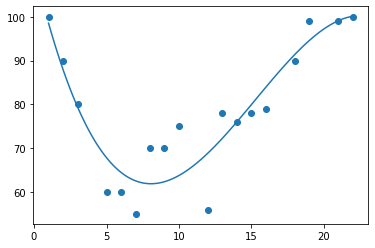

In [7]:
mymodel = np.poly1d(np.polyfit(x,y,3)) # Make poly model
myline= np.linspace(1,22,100)# line should start at 1, end at 22

plt.scatter(x,y) #Draw original scatter plot
plt.plot(myline,mymodel(myline)) #Draw the line of polynomail
plt.show()

In [10]:
# How well does my data fit in a plynomial regression
from sklearn.metrics import r2_score

In [11]:
print(r2_score(y,mymodel(x)))

0.8365213267692998


In [12]:
# 0.94 shows there is very good relationship

In [13]:
# Predict speed of a car at 17 P.M

In [14]:
speed = mymodel(17)
print(speed)

87.80202123064407


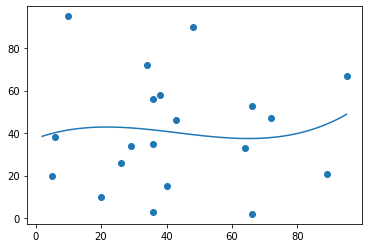

In [15]:
import numpy
import matplotlib.pyplot as plt

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(2, 95, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [16]:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.00995270756668043


In [17]:
# result: 0.00995 indicates a very bad relationship, and tells us that this data set is not suitable for polynomial regression

## Multiple Regression

In [18]:
# Same like Linear regression, but with more than one independent 
#variable, i.e we try to predict a value based on two or more variable

In [26]:
#Use of pandas
# To predict co2 emission of a car

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv("cars.csv")

In [24]:
df.shape

(36, 5)

In [25]:
# Let the independent variabes be X
# Let the dependent variable be Y

In [28]:
X = df[['Weight', 'Volume']] # upper case
y = df['CO2'] # lower case

In [29]:
from sklearn import linear_model # To use LinearRegression() which as a mthd called fit()

In [32]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

Now we have regression object that are ready to predict CO2 values on a car´s weight and volume

In [33]:
# assume weight = 2300Kg, Volume = 1300cm

In [34]:
predictedCO2 = regr.predict([[2300,1300]])

In [35]:
predictedCO2

array([107.2087328])

In [36]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300ccm:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

[107.2087328]


In [37]:
# In summary, we have predicted that a car with 1.3 liter engine, and a weight of 2300Kg,
#will release approxi 107 grams of CO2 for every kilometer it drives

## COEFFICIENT

In [38]:
# A factor that describe the relationship with an unknown variable, 2x, x unknown, 2 coeff.

In [39]:
# Print the coeff values of the regression object:

In [40]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[0.00755095 0.00780526]


Weight: =0.00755095
Volume : =0.00780526

These values tell us that if the weight increase by 1Kg, the CO2 emission increases by 0.00755095g,
And if the engine size(Volume) increase by 1cm, the CO2 emission increase by 0.0078052 g

In [41]:
# Already, 1300ccm, 2300kg, co2 = 107g
# Lets add 1000Kg

In [43]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)
predictedCO2 = regr.predict([[3300, 1300]])
print(predictedCO2)

[114.75968007]


We have predicted that a car with 1.3 liter engine, and a weight of 3300 kg, will release approximately 115 grams of CO2 for every kilometer it drives.

Which shows that the coefficient of 0.00755095 is correct:

107.2087328 + (1000 * 0.00755095) = 114.75968

In [53]:
from scipy import stats
np.random.seed(12345678)

In [44]:
x = np.random.random(10)

In [45]:
x

array([0.049881  , 0.14969742, 0.92499393, 0.11167088, 0.86709136,
       0.42029636, 0.07496632, 0.67479902, 0.45820821, 0.95983169])

In [46]:
y = 1.6*x + np.random.random(10)

In [47]:
y

array([0.13984987, 1.23632222, 1.95536865, 0.53978206, 2.31109147,
       1.59583075, 0.91392172, 1.4519099 , 1.38563227, 1.88800053])

In [48]:
#Perform the linear regression:

In [49]:
#Missing values are considered pair-wise: if a value is missing in x, the corresponding value in y is masked.

In [54]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [55]:
print("slope: %f    intercept: %f" % (slope, intercept))

slope: 1.596552    intercept: 0.592759


In [56]:
print("R-squared: %f" % r_value**2)

R-squared: 0.777658


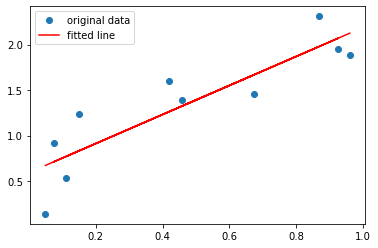

In [57]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()